# 멜론 시대별 Top 100 차트 (1984~2020) 데이터 EDA
* 멤버수
* 곡 장르
* 곡 제목수

In [1]:
# 라이브러리 로드
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
melon_df = pd.read_csv('data/Realfinal.csv', encoding='utf-8-sig')

In [3]:
melon_df.head()

,연도,순위,제목,가수,앨범,좋아요 수,발매일,장르,가사,팬수,멤버수,솔로/그룹,성별,작사,작곡,편곡
0,1984.0,1,내일,김수철,작은 거인 김수철 (못다핀 꽃 한 송이),2172.0,1983.08.15,록/메탈,스쳐가는 은빛 사연들이 밤하늘에 가득차고 풀나무에 맺힌 이슬처럼 외로움이 찾아 드네...,886.0,1.0,솔로,남성,김수철,김수철,김수철
1,1984.0,2,그것은 인생,최혜영,최혜영 1,1157.0,1983.12.05,성인가요,나나나 나나나 나나나나 나나나 나나나 나나나나 아기 때는 젖주면 좋아하고 아하 아이...,67.0,1.0,솔로,여성,박건호,김재일,김명곤
2,1984.0,3,잃어버린 정,김수희,김수희 3,949.0,1984.01.30,성인가요,당신의 고운 눈매에 할말을 잊었지만은 냉정히 돌아선 무정한 사람은 눈물을 모르겠지요...,714.0,1.0,솔로,여성,김중순,김중순,이경석
3,1984.0,4,유리벽,신형원,신형원 베스트 1982-2000,693.0,2000.09.05,포크/블루스,내가 너의 손을 잡으려해도 잡을수가 없었네 보이지않는 그 무엇이 나를 슬프게 하였네...,362.0,1.0,솔로,여성,한돌,한돌,유지연
4,1984.0,5,J에게,이선희,아! 옛날이여,2375.0,1985.01.25,발라드,J 스치는 바람에 J 그대 모습 보이면 난 오늘도 조용히 그댈 그리워하네 J 지난밤...,34986.0,1.0,솔로,여성,이세건,이세건,Nan


In [4]:
melon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3682 entries, 0 to 3681
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   연도      3682 non-null   float64
 1   순위      3682 non-null   int64  
 2   제목      3682 non-null   object 
 3   가수      3682 non-null   object 
 4   앨범      3682 non-null   object 
 5   좋아요 수   3682 non-null   float64
 6   발매일     3682 non-null   object 
 7   장르      3682 non-null   object 
 8   가사      3682 non-null   object 
 9   팬수      3682 non-null   float64
 10  멤버수     3682 non-null   float64
 11  솔로/그룹   3682 non-null   object 
 12  성별      3682 non-null   object 
 13  작사      3682 non-null   object 
 14  작곡      3682 non-null   object 
 15  편곡      3682 non-null   object 
dtypes: float64(4), int64(1), object(11)
memory usage: 460.4+ KB


# EDA

## 멤버수
* 년도 별 그룹의 수 (어떤 년도가 그룹이 많았을까?)
* 그룹에 해당하는 아티스트의 평균 멤버수는?
* 남 그룹, 여 그룹 각자 평균 멤버수는?

In [5]:
melon_df.head(1)

,연도,순위,제목,가수,앨범,좋아요 수,발매일,장르,가사,팬수,멤버수,솔로/그룹,성별,작사,작곡,편곡
0,1984.0,1,내일,김수철,작은 거인 김수철 (못다핀 꽃 한 송이),2172.0,1983.08.15,록/메탈,스쳐가는 은빛 사연들이 밤하늘에 가득차고 풀나무에 맺힌 이슬처럼 외로움이 찾아 드네...,886.0,1.0,솔로,남성,김수철,김수철,김수철


In [6]:
# 그룹 df
group_df = melon_df[melon_df['솔로/그룹'] == '그룹']

In [7]:
group_df.groupby('연도')['솔로/그룹'].count()

연도
1984.0    10
1985.0    22
1986.0    21
1987.0    18
1988.0    20
1989.0    17
1990.0    17
1991.0    19
1992.0    14
1993.0    25
1994.0    40
1995.0    39
1996.0    47
1997.0    43
1998.0    40
1999.0    38
2000.0    30
2001.0    30
2002.0    37
2003.0    38
2004.0    35
2005.0    44
2006.0    43
2007.0    38
2008.0    55
2009.0    61
2010.0    58
2011.0    71
2012.0    59
2013.0    49
2014.0    45
2015.0    49
2016.0    32
2017.0    40
2018.0    49
2019.0    30
2020.0    37
Name: 솔로/그룹, dtype: int64

In [8]:
# 그룹수가 가장 많았던 연도 5개
group_df.groupby('연도')['솔로/그룹'].count().sort_values(ascending=False).head()

연도
2011.0    71
2009.0    61
2012.0    59
2010.0    58
2008.0    55
Name: 솔로/그룹, dtype: int64

연도별 top100 차트에 있던 가수 중 그룹이었던 가수가 가장 많았던 연도는 2011년, 그 뒤로는 2009년이 뒤를 이었다.

In [9]:
# 한글 폰트 설정
plt.style.use("fivethirtyeight")
plt.rc("font", family = "Malgun Gothic")

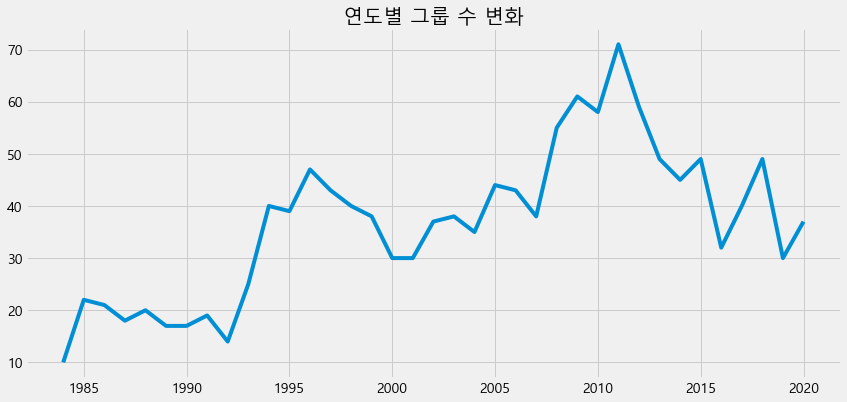

In [10]:
# 시각화
plt.figure(figsize= (13, 6))
plt.title('연도별 그룹 수 변화', fontsize = 20)
plt.plot(group_df.groupby('연도')['솔로/그룹'].count())

눈에 띄는 년도는 1997, 2011년으로 그래프가 솟은 것을 볼 수 있음. 2011년 이후로는 감소 추세를 보이고 있다.

In [11]:
# 연도별, 성별 그룹 수
year_sex = pd.DataFrame(group_df.groupby(['연도', '성별'])['솔로/그룹'].count())
year_sex = year_sex.rename(columns = {'솔로/그룹' : '그룹수'})
year_sex

그룹수
연도     성별     
1984.0 남성    5
       여성    1
       혼성    4
1985.0 남성   11
       혼성   11
...        ...
2019.0 여성    8
       혼성    1
2020.0 남성   18
       여성   13
       혼성    6

[102 rows x 1 columns]

<AxesSubplot:title={'center':'연도별 성별 그룹 수 변화'}, xlabel='연도', ylabel='그룹수'>

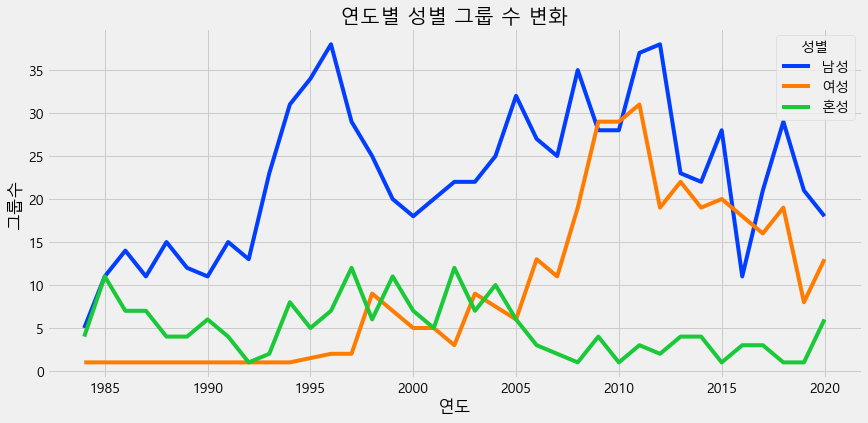

In [12]:
# 시각화
plt.figure(figsize= (13, 6))
plt.title('연도별 성별 그룹 수 변화', fontsize = 20)
sns.set_palette("bright")
sns.lineplot(data=year_sex, x="연도", y="그룹수", hue="성별")

1997~1998년에는 무슨일이...? 혼성 그룹은 남,여 그룹에 비해 저조한 비율

남성그룹은 감소, 여성그룹은 증가하는 추세. but 남, 여 그룹 모두 2010년대 초반에 많이 나온 것을 알 수 있음.
특히 여성그룹은 2005년 ~ 2010년 사이 가파른 성장세를 보임.

그렇다면 그룹에 해당하는 아티스트의 평균 멤버수는 몇 명일까?

In [13]:
group_df.tail(2)

,연도,순위,제목,가수,앨범,좋아요 수,발매일,장르,가사,팬수,멤버수,솔로/그룹,성별,작사,작곡,편곡
3676,2020.0,95,Inner Child,방탄소년단,MAP OF THE SOUL : 7,145156.0,2020.02.21,랩/힙합,그때 우리 참 많이 힘들었지 너무나 먼 저 하늘의 별 올려보면서 그때의 넌 은하수...,777869.0,7.0,그룹,남성,RM MattThomson MaxLynedochGraham RyanLawrie El...,RM MattThomson MaxLynedochGraham RyanLawrie El...,Nan
3680,2020.0,99,"너에게 난, 나에게 넌",미도와 파라솔,슬기로운 의사생활 OST Part 12,71370.0,2020.05.29,"발라드, 국내드라마",너에게 난 해질녘 노을처럼 한편의 아름다운 추억이 되고 소중했던 우리 푸르던 날을 ...,11105.0,5.0,그룹,혼성,송봉주(자전거탄풍경),송봉주(자전거탄풍경),이상훈


In [14]:
group_df['멤버수'].mean()

3.6257352941176473

그룹에 해당하는 아티스트들의 멤버수는 평균 3.6명

In [15]:
# 연도별 평균 멤버수
year_member = group_df.groupby('연도')['멤버수'].mean()
year_member

연도
1984.0    2.100000
1985.0    2.363636
1986.0    2.095238
1987.0    2.333333
1988.0    2.500000
1989.0    3.000000
1990.0    3.058824
1991.0    2.631579
1992.0    2.285714
1993.0    3.200000
1994.0    2.350000
1995.0    2.538462
1996.0    2.510638
1997.0    2.790698
1998.0    2.850000
1999.0    4.263158
2000.0    3.533333
2001.0    3.333333
2002.0    3.945946
2003.0    3.368421
2004.0    3.171429
2005.0    3.340909
2006.0    3.511628
2007.0    3.500000
2008.0    3.672727
2009.0    4.508197
2010.0    3.896552
2011.0    3.732394
2012.0    3.610169
2013.0    3.306122
2014.0    3.822222
2015.0    4.285714
2016.0    5.093750
2017.0    5.175000
2018.0    5.755102
2019.0    5.100000
2020.0    5.351351
Name: 멤버수, dtype: float64

In [16]:
year_member.sort_values(ascending=False).head()

연도
2018.0    5.755102
2020.0    5.351351
2017.0    5.175000
2019.0    5.100000
2016.0    5.093750
Name: 멤버수, dtype: float64

평균 멤버수가 가장 높았던 년도는 모두 최근 5년 이내의 년도. 그 중에서도 2018년의 차트 순위에 들었던 그룹의 평균 멤버수는 5.7명으로 6명에 가까운 숫자를 보임.

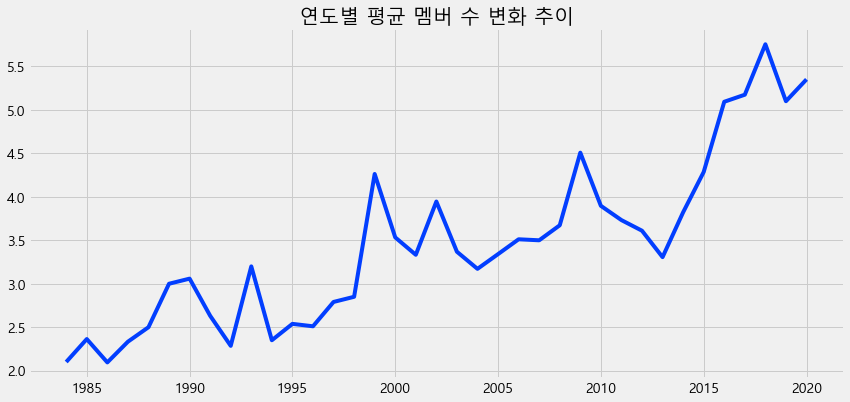

In [17]:
# 시각화
plt.figure(figsize= (13, 6))
plt.title('연도별 평균 멤버 수 변화 추이', fontsize = 20)
plt.plot(group_df.groupby('연도')['멤버수'].mean())

전체적으로 봤을 때 그룹의 멤버수는 계속해서 증가하고 있는 추세.

성별로 보는 전체년도 평균 멤버수는?

In [18]:
# 남자그룹의 평균 멤버수
male_group = group_df[group_df['성별'] == '남성']
male_group['멤버수'].mean()

3.3082437275985663

In [19]:
# 여자그룹의 평균 멤버수
female_group = group_df[group_df['성별'] == '여성']
female_group['멤버수'].mean()

4.627218934911243

In [20]:
mixed_group = group_df[group_df['성별'] == '혼성']
mixed_group['멤버수'].mean()

3.2324324324324323

전체년도에서는 남그룹 평균 3.3명, 여그룹 평균 4.6명, 혼성그룹 평균 3.2명의 멤버수를 보임

앞의 시각화를 통해 그룹이 가장 많았던 2011년을 기준으로 2011년 이전, 2011년 이후의 그룹의 평균 멤버수에는 차이가 있을까?

In [21]:
member_count =  pd.DataFrame(group_df.groupby(['연도', '성별'])['멤버수'].mean())
member_count = member_count.reset_index()
member_count

,연도,성별,멤버수
0,1984.0,남성,2.000000
1,1984.0,여성,2.000000
2,1984.0,혼성,2.250000
3,1985.0,남성,2.545455
4,1985.0,혼성,2.181818
...,...,...,...
97,2019.0,여성,5.875000
98,2019.0,혼성,2.000000
99,2020.0,남성,5.777778
100,2020.0,여성,5.769231


<AxesSubplot:title={'center':'연도별 성별 평균 멤버수 변화 추이'}, xlabel='연도', ylabel='멤버수'>

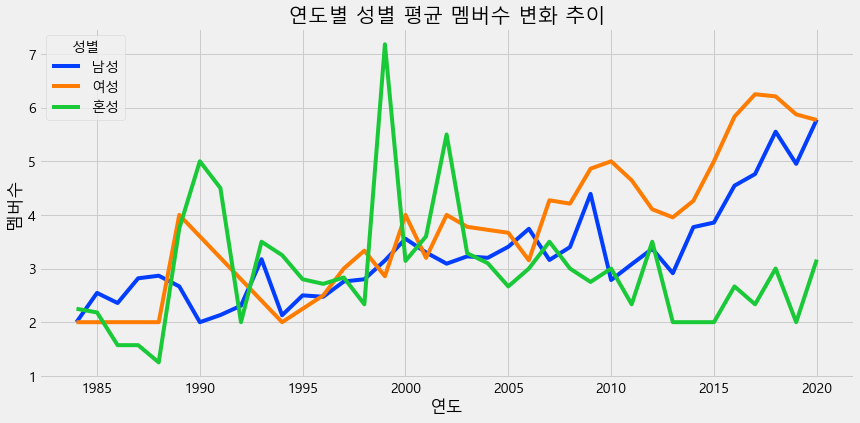

In [22]:
# 시각화
plt.figure(figsize=(13, 6))
plt.title("연도별 성별 평균 멤버수 변화 추이")
sns.set_palette("bright")
sns.lineplot(data=member_count, x='연도', y='멤버수', hue='성별')

<AxesSubplot:title={'center':'2011년 이전 평균 멤버수'}, xlabel='연도', ylabel='멤버수'>

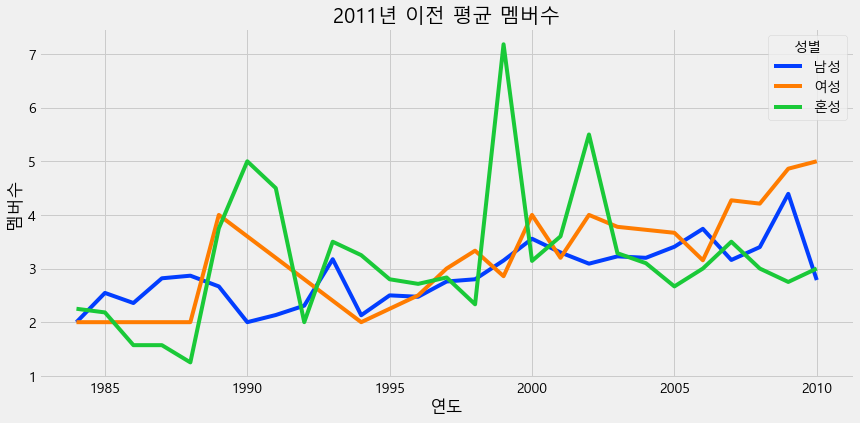

In [23]:
# 2011년 이전
plt.figure(figsize=(13, 6))
plt.title("2011년 이전 평균 멤버수")
sns.set_palette("bright")
sns.lineplot(data=member_count[member_count['연도'] < 2011], x='연도', y='멤버수', hue='성별')

<AxesSubplot:title={'center':'2011년 이후 평균 멤버수'}, xlabel='연도', ylabel='멤버수'>

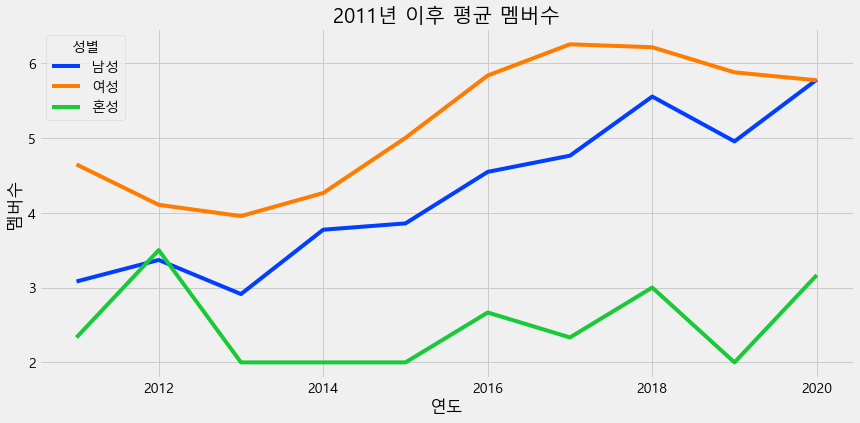

In [24]:
# 2011년 이후
plt.figure(figsize=(13, 6))
plt.title("2011년 이후 평균 멤버수")
sns.set_palette("bright")
sns.lineplot(data=member_count[member_count['연도'] >= 2011], x='연도', y='멤버수', hue='성별')

2011년을 기준으로 여성그룹, 남성그룹의 평균 멤버수는 증가추세를 보임. 혼성그룹은 1990년대 초반과 말에만 평균 멤버수의 수가 높았음

전체년도에서 여그룹 평균 멤버수는 4.6명, 2011년 이후로는 평균 멤버수가 5명대를 유지하고 있으므로 종합적으로 여그룹의 멤버수는 4명 or 5명을 추천.

그렇다면 5명의 멤버수를 넘긴다면?
5명의 멤버수를 넘긴 여그룹은 차트에 곡이 몇 개 정도 올랐을까?

In [25]:
# 순위에 오른 4인 이상 여그룹 곡의 총 수(중복 제거)
tot_member_count = female_group[female_group['멤버수'] >= 4]['제목'].nunique()
tot_member_count

235

In [26]:
# 6명 이상의 멤버수를 가진 여그룹의 순위에 오른 곡 수 (중복 제거)
six_over_member = female_group[female_group['멤버수'] >= 6]['제목'].nunique()
six_over_member

71

In [27]:
# 4명의 멤버수를 가진 여그룹의 순위에 오른 곡 수 (중복 제거)
four_member = female_group[female_group['멤버수'] == 4]['제목'].nunique()
four_member

111

In [28]:
# 5명의 멤버수를 가진 여그룹의 순위에 오른 곡 수 (중복 제거)
five_member = female_group[female_group['멤버수'] == 5]['제목'].nunique()
five_member

53

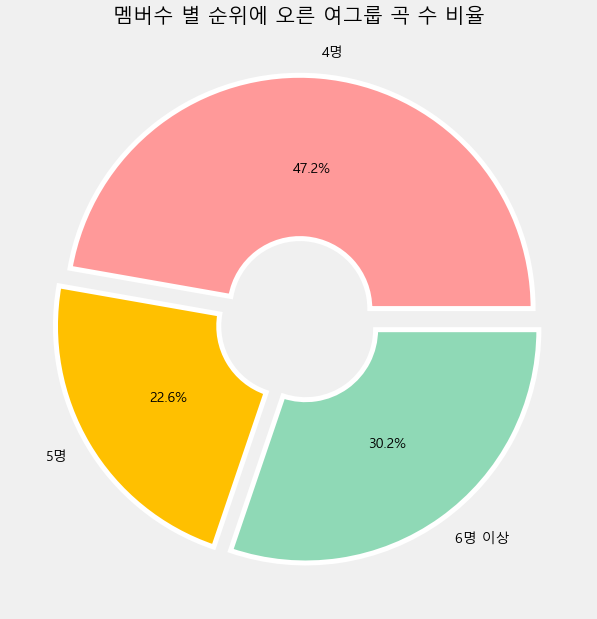

In [29]:
# 파이차트로 시각화
data = [four_member/tot_member_count, five_member/tot_member_count,six_over_member/tot_member_count]
categories= ['4명', '5명', '6명 이상']
explode = [0.05, 0.05, 0.05]
colors = ['#ff9999', '#ffc000', '#8fd9b6']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.figure(figsize=(10, 10))
plt.pie(data, labels=categories, autopct='%.1f%%', explode=explode, colors = colors, wedgeprops=wedgeprops)
plt.title('멤버수 별 순위에 오른 여그룹 곡 수 비율')
plt.show()

<AxesSubplot:title={'center':'멤버수 별 순위에 오른 여그룹 곡 수'}, xlabel='멤버수', ylabel='곡 수'>

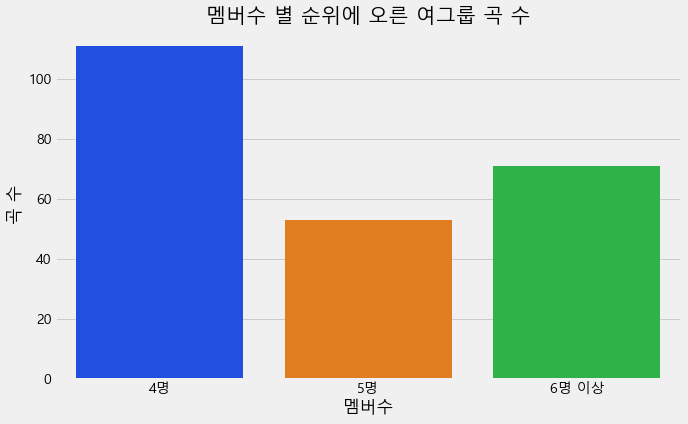

In [30]:
# 바 차트 시각화
data_2 = pd.DataFrame({'멤버수' : ['4명', '5명', '6명 이상'],
                       '곡 수' : [111, 53, 71]})
plt.figure(figsize=(10, 6))
plt.title('멤버수 별 순위에 오른 여그룹 곡 수')
sns.set_palette("bright")
sns.barplot(data=data_2, x='멤버수', y='곡 수')

5명의 멤버수를 넘겼을 때보다 추천했던 4~5명의 멤버수를 가진 그룹의 순위에 오른 곡 수의 비율이 더 높다.
* 6명이상: 71곡, 4명: 111곡, 5명: 53곡
* 전통적으로 여그룹은 4명의 멤버수일 때 차트에 오르는 곡 수가 많았기에 4명을 추천하지만, 최근 트렌드는 평균 5명의 멤버이므로 5명도 고려

한 그룹에 곡 수가 편향되었을수도 있으니 그룹별로 몇 곡이 있는지 다시 파이차트로 시각화

In [31]:
# 곡 수가 몇몇 그룹에게 편향된 것은 아닌지 알아보기 위해 파이차트로 시각화
pie_member = pd.DataFrame(female_group[(female_group['가수'] == '이브') | (female_group['가수'] == '핑클 (Fin.K.L)') | (female_group['가수'] == '샤크라') | (female_group['가수'] == '빅마마') | (female_group['가수'] == '쥬얼리') | (female_group['가수'] == '버블 시스터즈') | 
                         (female_group['가수'] == '슈가') | (female_group['가수'] =='브라운아이드걸스') | (female_group['가수'] == '블랙펄') | (female_group['가수'] == '2NE1') | (female_group['가수'] == '미쓰에이') | (female_group['가수'] == '시크릿') | 
                         (female_group['가수'] == '씨스타') | (female_group['가수'] == '걸스데이') | (female_group['가수'] =='써니힐') |  (female_group['가수'] =='마마무 (Mamamoo)') | (female_group['가수'] =='BLACKPINK') |
                         (female_group['가수'] == '환불원정대') | (female_group['가수'] == '베이비복스') | (female_group['가수'] == '원더걸스') | (female_group['가수'] == '4minute') | (female_group['가수'] == '카라') | 
                        (female_group['가수'] == 'f(x)') | (female_group['가수'] =='시크릿') | (female_group['가수'] == '크레용팝') | (female_group['가수'] == '레이디스 코드') | 
                        (female_group['가수'] == 'EXID') | (female_group['가수'] == 'Red Velvet (레드벨벳)') | (female_group['가수'] == 'ITZY (있지)') | 
                         (female_group['가수'] == '소녀시대 (GIRLS\' GENERATION)') | (female_group['가수'] == '티아라, 초신성') | (female_group['가수'] == '애프터스쿨') | (female_group['가수'] == '티아라') | 
                         (female_group['가수'] == '레인보우') | (female_group['가수'] =='달샤벳') | (female_group['가수'] == 'F-ve Dolls') | (female_group['가수'] == 'Apink (에이핑크)') | 
                         (female_group['가수'] == 'AOA') | (female_group['가수'] == '여자친구 (GFRIEND)') | (female_group['가수'] == 'TWICE (트와이스)') | (female_group['가수'] == '아이오아이 (I.O.I)') | 
                         (female_group['가수'] == '러블리즈') |(female_group['가수'] == '언니쓰') | (female_group['가수'] == '모모랜드 (MOMOLAND)') | (female_group['가수'] == '(여자)아이들') |  
                         (female_group['가수'] == '오마이걸 (OH MY GIRL)') | (female_group['가수'] == 'IZ*ONE (아이즈원)')].groupby('가수')['제목'].nunique().sort_values(ascending=False))
pie_member = pie_member.rename(columns={'제목' : '곡 수'})
pie_member

,곡 수
가수,
2NE1,19
씨스타,14
소녀시대 (GIRLS' GENERATION),14
TWICE (트와이스),12
브라운아이드걸스,11
원더걸스,10
티아라,9
4minute,9
마마무 (Mamamoo),9


<AxesSubplot:ylabel='곡 수'>

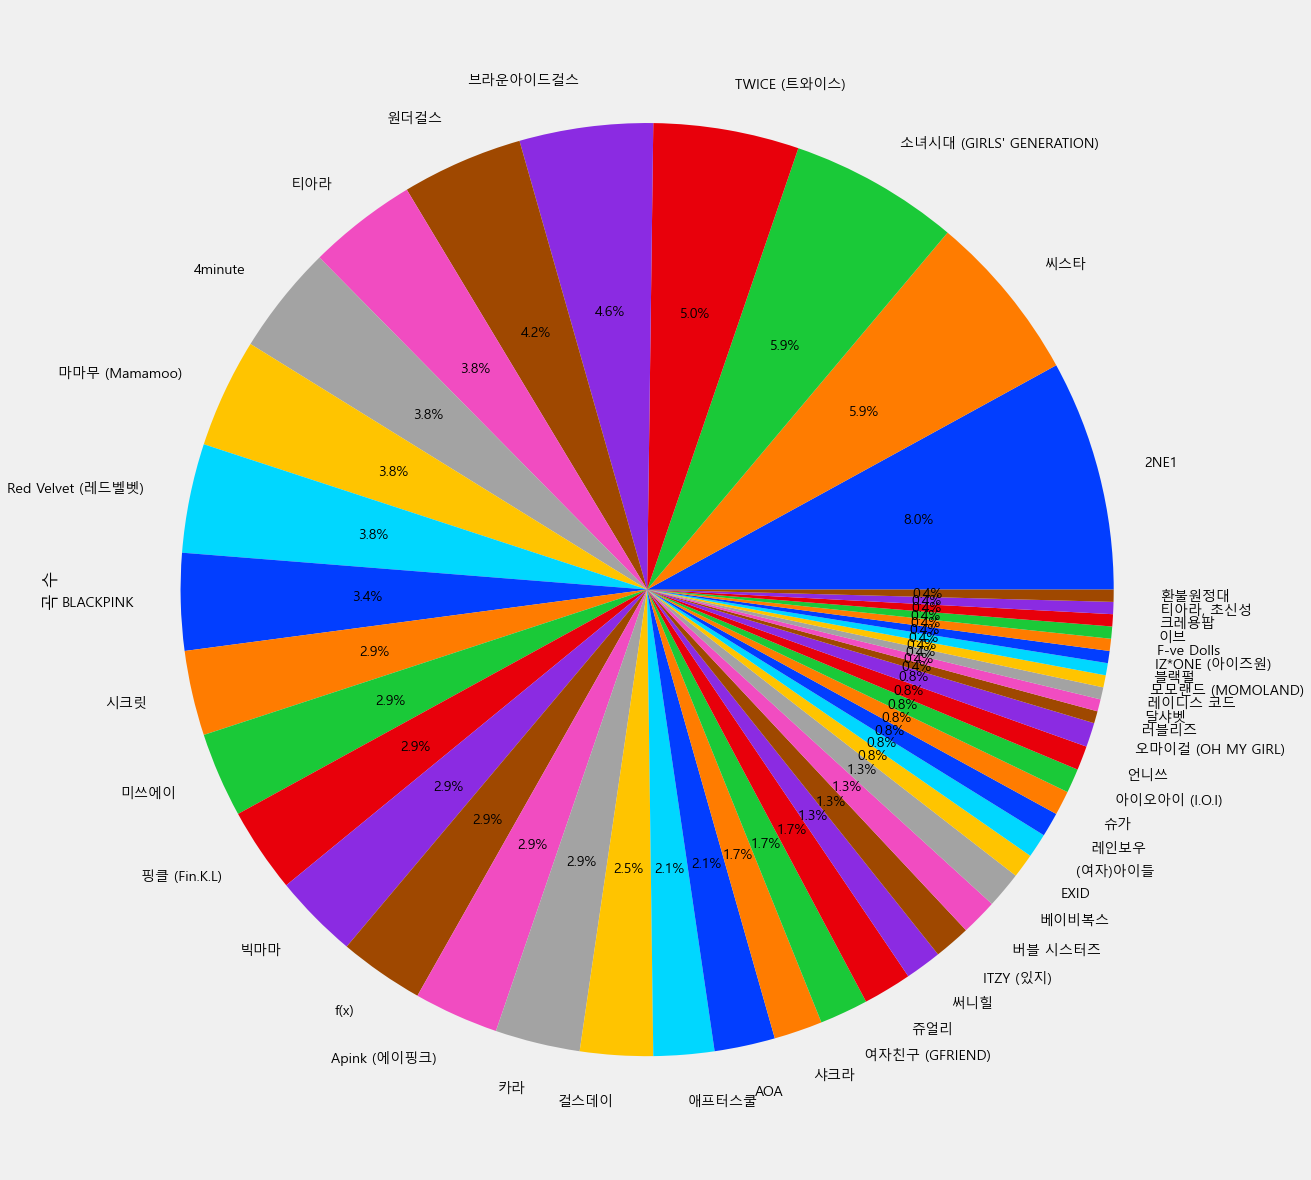

In [32]:
pie_member.plot.pie(y='곡 수', figsize = (20, 20), legend = False, autopct = "%.1f%%")

2NE1의 곡 수 비율이 가장 높긴 하지만 그룹별로 심한 편향을 보이지는 않음.

결론적으로 그룹의 멤버수는 4명(전통적인 멤버수) or 5명(최근 트렌드)으로 하는 것이 적당하다

## 곡 장르
* 최근 30년간 장르 트렌드 변화
* 연도별 가장 인기있는 장르는?
* 그룹의 성별에 따라 인기있는 장르가 다를까?
* 솔로 아티스트의 인기 장르는?
* 연도별 좋아요 수가 많은 장르는?
* 연대별 1위를 가장 많이 차지한 장르는?

### 장르 트렌드 변화

In [33]:
# 최근 30년간 가장 인기있었던 장르 top10
top_genre = pd.DataFrame(melon_df.groupby('장르')['제목'].count().sort_values(ascending=False)).reset_index().head(10)
top_genre = top_genre.rename(columns = {'제목' : '곡 수'})
top_genre

,장르,곡 수
0,발라드,1443
1,댄스,809
2,록/메탈,328
3,랩/힙합,288
4,R&B/Soul,189
5,성인가요,184
6,포크/블루스,145
7,"발라드, 국내드라마",93
8,"인디음악, 록/메탈",25
9,"인디음악, 포크/블루스",23


In [34]:
# 최근 30년간 장르 트렌드의 변화
# 연도별 트렌드 장르
year_trend = pd.DataFrame(melon_df.groupby(['연도','장르'])['제목'].count()).reset_index().rename(columns = {'제목' : '곡 수'})


# 연도별 곡 수가 가장 많은 장르만 출력
idx = year_trend.groupby(['연도'])['곡 수'].transform(max) == year_trend['곡 수']
year_trend[idx]

,연도,장르,곡 수
6,1984.0,성인가요,30
12,1985.0,성인가요,33
17,1986.0,발라드,39
24,1987.0,발라드,43
33,1988.0,발라드,52
42,1989.0,발라드,52
50,1990.0,발라드,59
56,1991.0,발라드,63
65,1992.0,발라드,62
75,1993.0,발라드,46


'발라드' 장르가 예전부터 꾸준히 top100 차트에 머무는 것을 발견. 눈여겨볼만한 것은 2000년대에는 발라드가 유행하다가 2010년에 와서는 '댄스' 장르가 인기가 있었던것으로 나타남. 아마 2세대 아이돌(빅뱅, 투애니원, 소녀시대, 샤이니 등등...)의 등장이 영향을 미치지 않았을까 생각이 듦. 그러나 최근(2019년)부터는 다시 발라드곡이 top100차트에 많이 올라온 것을 볼 수 있음.

### 그룹이 많이 시도했던 장르는?
* 여그룹이 많이 시도한 장르, 남그룹이 많이 시도한 장르
* 그룹의 성별에 따라 인기있는 장르가 다른가?

In [35]:
# 여그룹의 인기있는 장르 top10
female_group_trend = pd.DataFrame(female_group.groupby('장르')['제목'].count()).rename(columns = {'제목' : '곡 수'}).reset_index().sort_values(by = '곡 수', ascending=False).head(10)
female_group_trend

,장르,곡 수
1,댄스,249
4,발라드,50
0,R&B/Soul,22
2,랩/힙합,6
6,"발라드, 국내드라마",4
8,일렉트로니카,3
3,록/메탈,2
5,"발라드, R&B/Soul",1
7,성인가요,1


<AxesSubplot:title={'center':'여그룹 인기 장르'}, xlabel='장르', ylabel='곡 수'>

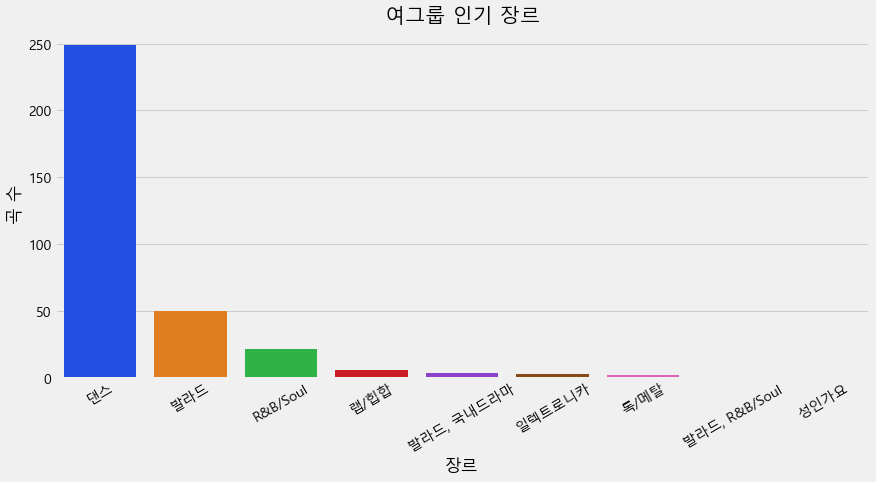

In [36]:
# 시각화
plt.figure(figsize=(13, 6))
plt.title('여그룹 인기 장르')
plt.xticks(rotation = 30)
sns.set_palette("bright")
sns.barplot(data=female_group_trend, x='장르', y='곡 수')

In [37]:
# 남그룹의 인기있는 장르 top10
male_group_trend = pd.DataFrame(male_group.groupby('장르')['제목'].count()).rename(columns = {'제목' : '곡 수'}).reset_index().sort_values(by = '곡 수', ascending=False).head(10)
male_group_trend

,장르,곡 수
7,발라드,237
1,댄스,200
5,록/메탈,140
4,랩/힙합,121
0,R&B/Soul,40
19,포크/블루스,28
17,"인디음악, 록/메탈",15
3,"댄스, 랩/힙합",13
9,"발라드, 국내드라마",8
14,"발라드, 인디음악",7


<AxesSubplot:title={'center':'남그룹 인기 장르'}, xlabel='장르', ylabel='곡 수'>

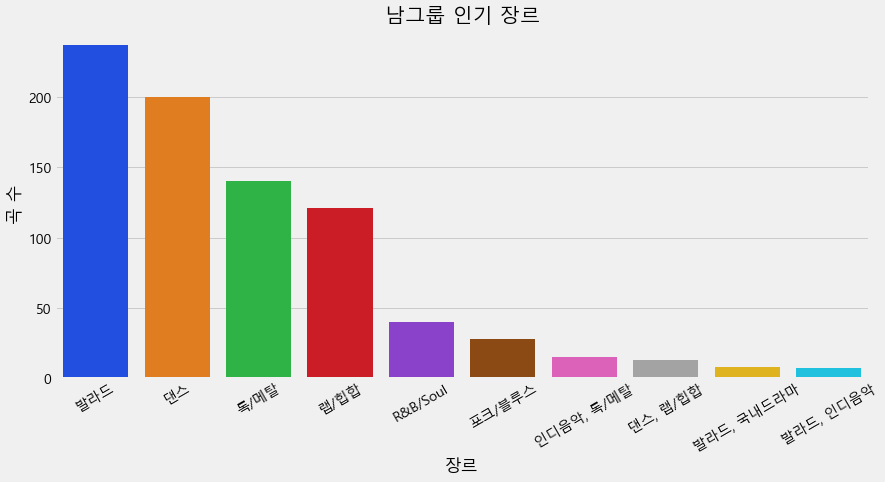

In [38]:
# 시각화
plt.figure(figsize=(13, 6))
plt.title('남그룹 인기 장르')
plt.xticks(rotation = 30)
sns.set_palette("bright")
sns.barplot(data=male_group_trend, x='장르', y='곡 수')

여그룹, 남그룹 인기있는 장르가 다른 것을 알 수 있음.
여그룹은 댄스 장르가 압도적으로 많은 반면 남그룹은 발라드, 댄스 장르의 차이가 크지 않으며 여그룹보다 비교적으로 다양한 장르의 곡이 순위에 오른 것을 볼 수 있다.

남, 여그룹 모두 인기가 있는 장르는 '댄스'이며 만약 여그룹을 데뷔시킨다면 '댄스' 장르의 곡으로 데뷔를 시키는 것이 유리할 것으로 예상된다.

### 좋아요 수와 장르
* 종합적으로 좋아요 수가 가장 많은 장르 top10
* 연도별 좋아요 수가 가장 많은 장르
* 여그룹 곡 중 좋아요 수가 많은 장르

In [39]:
# 전체년도에서 좋아요 수가 많은 장르 top 10
likes_sum = pd.DataFrame(melon_df.groupby('장르')['좋아요 수'].sum().sort_values(ascending=False).reset_index().head(10))
likes_sum

,장르,좋아요 수
0,발라드,44733658.0
1,댄스,32830373.0
2,랩/힙합,24459675.0
3,R&B/Soul,13494038.0
4,"발라드, 국내드라마",9601979.0
5,록/메탈,8404513.0
6,"인디음악, 포크/블루스",3824287.0
7,"인디음악, 록/메탈",2398780.0
8,포크/블루스,1804207.0
9,"발라드, 인디음악",1264744.0


<AxesSubplot:title={'center':'총 좋아요 수 top10 장르'}, xlabel='장르', ylabel='좋아요 수'>

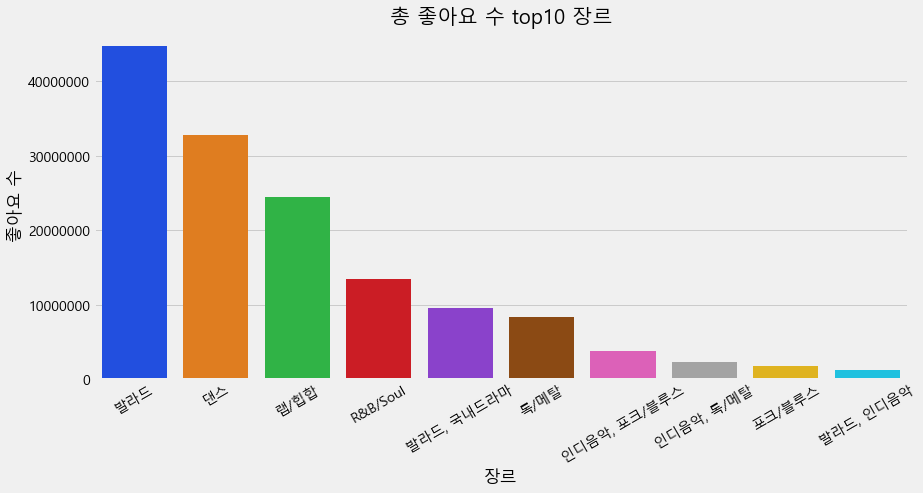

In [40]:
# 좋아요 수 시각화
plt.figure(figsize = (13, 6))
plt.ticklabel_format(style='plain') # 숫자 평평하게
plt.xticks(rotation = 30)
plt.title('총 좋아요 수 top10 장르')
sns.set_palette("bright")
sns.barplot(data=likes_sum, x='장르', y='좋아요 수')

In [41]:
# 연도별 총 좋아요 수가 가장 많은 장르만 출력
year_like_cnt = pd.DataFrame(melon_df.groupby(['연도','장르'])['좋아요 수'].sum()).reset_index().rename(columns = {'제목' : '곡 수'})

idx = year_like_cnt.groupby(['연도'])['좋아요 수'].transform(max) == year_like_cnt['좋아요 수']
year_like_cnt[idx]

,연도,장르,좋아요 수
6,1984.0,성인가요,15977.0
10,1985.0,발라드,24369.0
19,1986.0,성인가요,36849.0
24,1987.0,발라드,107834.0
33,1988.0,발라드,164144.0
42,1989.0,발라드,160421.0
50,1990.0,발라드,192000.0
56,1991.0,발라드,168959.0
65,1992.0,발라드,163877.0
75,1993.0,발라드,122407.0


대부분의 연도에서 총 좋아요 수 역시 '발라드' 장르가 강세를 보였지만 가장 최근인 2020년 top 100 차트에서는 '댄스' 장르의 총 좋아요 수가 가장 많은 것을 알 수 있다.
아무래도 아이돌 그룹 팬의 특성상 음원 총공 같은 충성심이 총 좋아요 수에 영향을 미치지 않았나 싶다.

In [42]:
# 솔로/그룹 여부와 좋아요 수의 상관관계 (범주형변수, 수치형변수 간의 상관분석)

# '음원총공'이라는 문화가 생겼던 2014년 이후의 데이터들만 가지고 상관분석 진행

melon_df_after = melon_df[melon_df['연도'] >= 2014]

In [43]:
# 솔로/그룹 여부는 범주형 변수이므로 더미변수로 변경한 후 상관분석을 진행해주어야 함
# 그룹이면 0, 솔로면 1로 변경
melon_df_after_dummies = pd.get_dummies(melon_df_after['솔로/그룹'])

# del melon_df_after_dummies[melon_df_after_dummies.columns[0]]
melon_df_after_new = pd.concat([melon_df_after, melon_df_after_dummies], axis=1)

In [44]:
from scipy import stats

# 그룹과 좋아요 수 간의 피어슨 상관관계 (상관계수, p값 순)
stats.pearsonr(melon_df_after_new['그룹'], melon_df_after_new['좋아요 수'])

(0.015094475551981425, 0.690135444151336)

그룹과 좋아요 수 간에는 거의 상관관계가 없음

In [45]:
# 팬수과 좋아요 수 간의 피어슨 상관관계 (상관계수, p값 순)
stats.pearsonr(melon_df_after_new['팬수'], melon_df_after_new['좋아요 수'])

(0.5254731369072896, 6.038205203946431e-51)

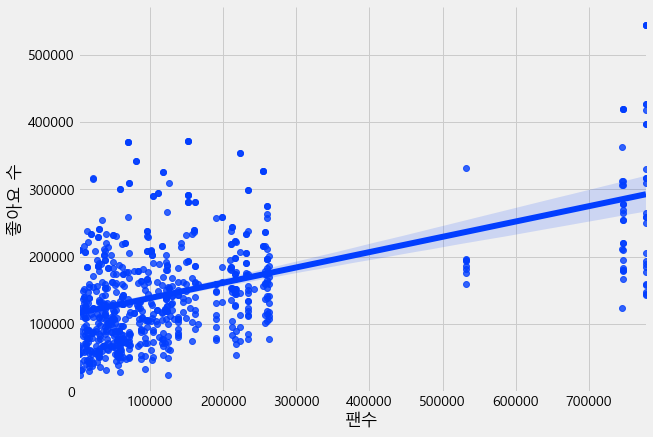

In [46]:
# 양의 상관관계를 확인하기 위해 lmplot으로 시각화
sns.set_palette("bright")
sns.lmplot(data=melon_df_after_new, x='팬수', y='좋아요 수', height=6, aspect=1.5)

솔로/그룹 여부보다는 팬 수와 좋아요 수간의 상관관계가 강하지는 않아도 있는 것으로 나타났다. 팬수가 많을 수록 좋아요 수도 많은 '양의 상관관계'를 보인다.
결국 그룹이든 솔로든 팬 수가 많아야 음원이 잘 될 가능성이 높다.

이것을 이용하여 음원사이트의 '팬 맺기'를 한 후 sns에 인증을 하면 포토카드나 CD를 보내주는 이벤트를 열어 팬의 유입을 늘리는 방안도 생각해보면 좋을 것. (음원이 잘 되려면 우선 팬을 모아야 하기 때문)

### 순위와 장르
* 전체년도에서 1위를 가장 많이 차지한 장르
* 최근 10년간 1위를 가장 많이 차지한 장르
* 여그룹 곡 중 1위를 가장 많이 차지한 장르 
* 솔로가수의 곡 중 1위를 가장 많이 차지한 장르

In [47]:
# 1위한 곡만 추출 
top_of_top = melon_df[melon_df['순위'] == 1]


# 전체년도에서 1위를 가장 많이 차지한 장르
top_of_top['장르'].value_counts()

발라드           12
댄스             9
랩/힙합           6
록/메탈           4
R&B/Soul       4
포크/블루스         1
발라드, 국내드라마     1
Name: 장르, dtype: int64

전체년도에서 1위를 가장 많이 차지한 장르는 '발라드' 다음이 '댄스' 장르

In [48]:
# 최근 10년간 시대별 차트에서 1위를 가장 많이 차지한 장르 (2010년 ~ 2020년)

top_of_top[(top_of_top['연도'] >= 2010) & (top_of_top['연도'] <= 2020)]['장르'].value_counts()

랩/힙합          5
댄스            3
발라드           1
R&B/Soul      1
발라드, 국내드라마    1
Name: 장르, dtype: int64

In [49]:
top_of_top[(top_of_top['연도'] >= 2010) & (top_of_top['연도'] <= 2020)]

,연도,순위,제목,가수,앨범,좋아요 수,발매일,장르,가사,팬수,멤버수,솔로/그룹,성별,작사,작곡,편곡
2582,2010.0,1,Bad Girl Good Girl,미쓰에이,Bad But Good,36744.0,2010.07.01,댄스,You don't know me You don't know me You don'...,21052.0,4.0,그룹,여성,박진영,박진영,박진영 홍지상
2682,2011.0,1,Roly-Poly,티아라,존트라볼타 워너비,39260.0,2011.06.29,댄스,어디까지 왔나 또 어디 숨었나 맘에 들어 왔나 나나나나나 I like you 어디서...,21133.0,6.0,그룹,여성,신사동호랭이,신사동호랭이,신사동호랭이
2782,2012.0,1,강남스타일,싸이 (PSY),싸이6甲 Part.1,157061.0,2012.07.15,랩/힙합,오빤 강남스타일 강남스타일 낮에는 따사로운 인간적인 여자 커피 한잔의 여유를 아는 ...,41576.0,1.0,솔로,남성,싸이(PSY),싸이(PSY) 유건형,유건형
2882,2013.0,1,자니,프라이머리,자니,177091.0,2012.03.07,랩/힙합,일 끝나서 친구들과 한잔 내일은 노는 토요일이니깐 일 얘기 사는 얘기 재미난 얘기 ...,67634.0,1.0,솔로,남성,다이나믹듀오,프라이머리 개코,프라이머리
2982,2014.0,1,썸,"소유 (SOYOU), 정기고",썸,178166.0,2014.02.07,R&B/Soul,썸 (Feat. 릴보이 Of 긱스) 가끔씩 나도 모르게 짜증이나 너를 향한 맘은 ...,29789.0,1.0,솔로,여성,민연재 Xepy 에스나(eSNa) 릴보이(lIlBOI) 정기고,김도훈(RBW) Xepy 에스나(eSNa),김도훈(RBW) 서용배(TENTEN)
3082,2015.0,1,뱅뱅뱅,BIGBANG,A,186204.0,2015.06.01,랩/힙합,난 깨어나 까만 밤과 함께 다 들어와 담엔 누구 차례 한 치 앞도 볼 수 없는 막장...,262173.0,4.0,그룹,남성,TEDDY G-DRAGON T.O.P,TEDDY G-DRAGON,TEDDY
3182,2016.0,1,CHEER UP,TWICE (트와이스),PAGE TWO,223306.0,2016.04.25,댄스,매일 울리는 벨벨벨 이젠 나를 배려 해줘 배터리 낭비하긴 싫어 자꾸만 봐 자꾸 자꾸...,215939.0,9.0,그룹,여성,SamLewis,블랙아이드필승,라도
3282,2017.0,1,첫눈처럼 너에게 가겠다,에일리(AILEE),도깨비 OST Part.9,326335.0,2017.01.07,"발라드, 국내드라마",널 품기 전 알지 못했다 내 머문 세상 이토록 찬란한 것을 작은 숨결로 닿은 사람 ...,117822.0,1.0,솔로,여성,이미나,로코베리,로코베리
3382,2018.0,1,사랑을 했다,iKON,Return,309781.0,2018.01.25,랩/힙합,사랑을 했다 우리가 만나 지우지 못할 추억이 됐다 볼만한 멜로드라마 괜찮은 결말 그...,125136.0,6.0,그룹,남성,B.I BOBBY 못말,B.I MILLENNIUM 승,MILLENNIUM
3482,2019.0,1,사랑에 연습이 있었다면,임재현,사랑에 연습이 있었다면,206690.0,2018.09.25,발라드,사랑에 연습이 있었다면 우리는 달라졌을까 내가 널 만난 시간 혹은 그 장소 상황이 ...,11051.0,1.0,솔로,남성,2soo,2soo,2soo


최근 10년간 시대별 차트에서 1위를 가장 많이 차지한 장르는 '랩/힙합', '댄스' 장르

In [50]:
# 예전에 인기있었던 발라드, 요즘 인기 있는 장르인 댄스, 랩/힙합 장르만 모아 시대별로 어떻게 변화했는지 보기
genre_trend_change = year_trend[(year_trend['장르'] == '발라드') | (year_trend['장르'] == '댄스') | (year_trend['장르'] == '랩/힙합')]
genre_trend_change

,연도,장르,곡 수
1,1984.0,댄스,2
3,1984.0,발라드,24
8,1985.0,댄스,5
10,1985.0,발라드,29
15,1986.0,댄스,6
...,...,...,...
332,2019.0,랩/힙합,13
336,2019.0,발라드,38
345,2020.0,댄스,21
346,2020.0,랩/힙합,18


<AxesSubplot:title={'center':'연도별 인기 장르 트렌드 변화'}, xlabel='연도', ylabel='곡 수'>

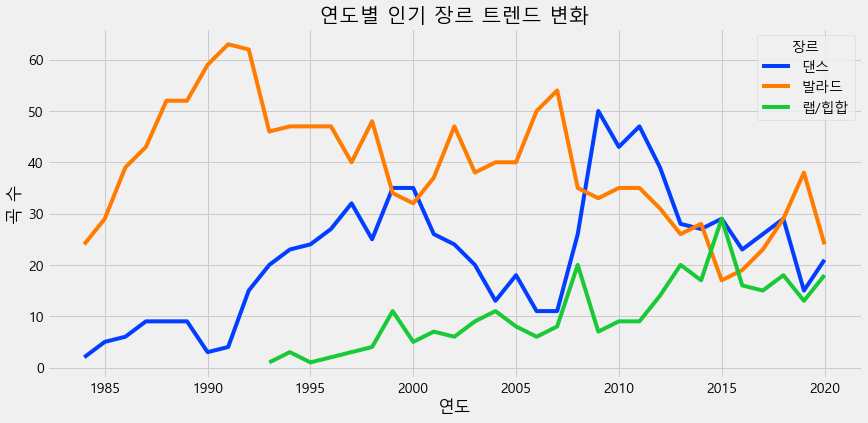

In [51]:
# 시각화
plt.figure(figsize=(13, 6))
plt.title("연도별 인기 장르 트렌드 변화")
sns.set_palette("bright")
sns.lineplot(data=genre_trend_change, x='연도', y='곡 수', hue='장르')

사재기가 의심되는 2019년을 제외하면 최근 10년간은 확실히 '발라드' 보다는 '댄스' 장르가 인기있는 것을 확인. 랩/힙합은 최근 들어서 상승하는 추세.

In [52]:
# 전체년도에서 여그룹 곡 중 시대별 차트에서 1위를 차지한 장르
top_of_top[(top_of_top['성별'] == '여성') & (top_of_top['솔로/그룹'] == '그룹')]['장르'].value_counts()

댄스          5
R&B/Soul    1
Name: 장르, dtype: int64

In [53]:
top_of_top[(top_of_top['성별'] == '여성') & (top_of_top['솔로/그룹'] == '그룹')]

,연도,순위,제목,가수,앨범,좋아요 수,발매일,장르,가사,팬수,멤버수,솔로/그룹,성별,작사,작곡,편곡
1882,2003.0,1,Break Away,빅마마,Like The Bible,14389.0,2003.02.06,R&B/Soul,이젠 날 떠나가줘 이젠 날 다 잊어줘 나를 버리고 살아가줘 가져간 내 사랑을 내게 ...,7559.0,4.0,그룹,여성,박경진,이현정,곽영준
2382,2008.0,1,So Hot,원더걸스,So Hot,25896.0,2008.06.03,댄스,왜 자꾸 쳐다보니 왜 내가 그렇게 예쁘니 아무리 그렇다고 그렇게 쳐다보면 내가 좀 ...,33921.0,5.0,그룹,여성,박진영,박진영,홍지상 박진영
2482,2009.0,1,Gee,소녀시대 (GIRLS' GENERATION),The First Mini Album 'Gee',39259.0,2009.01.05,댄스,Uh Huh Listen Boy My First Love Story My Angel...,104391.0,9.0,그룹,여성,이트라이브(E-TRIBE),이트라이브(E-TRIBE),이트라이브(E-TRIBE)
2582,2010.0,1,Bad Girl Good Girl,미쓰에이,Bad But Good,36744.0,2010.07.01,댄스,You don't know me You don't know me You don'...,21052.0,4.0,그룹,여성,박진영,박진영,박진영 홍지상
2682,2011.0,1,Roly-Poly,티아라,존트라볼타 워너비,39260.0,2011.06.29,댄스,어디까지 왔나 또 어디 숨었나 맘에 들어 왔나 나나나나나 I like you 어디서...,21133.0,6.0,그룹,여성,신사동호랭이,신사동호랭이,신사동호랭이
3182,2016.0,1,CHEER UP,TWICE (트와이스),PAGE TWO,223306.0,2016.04.25,댄스,매일 울리는 벨벨벨 이젠 나를 배려 해줘 배터리 낭비하긴 싫어 자꾸만 봐 자꾸 자꾸...,215939.0,9.0,그룹,여성,SamLewis,블랙아이드필승,라도


여그룹 중 시대별 1위를 한 곡의 장르는 '댄스'가 대부분.
시대별로 top100 차트를 세웠을 때, 1위를 한 여그룹은 '빅마마, 원더걸스, 소녀시대, 미쓰에이, 티아라, 트와이스'로 6팀밖에 없다. 그중에서도 최근 10년간 시대별 top100 차트에서 1위를 한 여그룹은 '미쓰에이, 티아라, 트와이스' 뿐이며 이 세 그룹 모두 '댄스' 장르의 곡으로 1위를 차지했다.

그러므로 여그룹을 데뷔 시킬 때는 '댄스' 장르가 유리할 것으로 예상된다.

## 곡 제목 수
* 시대별 곡 제목 수의 변화가 있는가?
* 최근 10년간 차트에 오른 곡들의 평균 곡 제목 수
* 곡 제목 수도 순위에 영향을 미치는가? (상관분석)

### 시대별 차트에서의 곡 제목 수의 변화

In [54]:
melon_df['곡제목수'] = melon_df['제목'].str.replace(' ', '').str.len()

In [55]:
# 추가된 컬럼 확인
melon_df.tail(1)

,연도,순위,제목,가수,앨범,좋아요 수,발매일,장르,가사,팬수,멤버수,솔로/그룹,성별,작사,작곡,편곡,곡제목수
3681,2020.0,100,어떤 날엔,김재환,사랑의 불시착 OST Part 5,61246.0,2020.01.19,"발라드, 국내드라마",어디쯤인 건지 그대와 나 있는 곳 이렇게 그저 떠올리기만 해도 나는 떨림을 느껴요 ...,58591.0,1.0,솔로,남성,김호경,1601,1601,4


In [56]:
# 시대별 차트의 평균 곡 제목 수 변화
title_len_count = pd.DataFrame(melon_df.groupby('연도')['곡제목수'].mean().reset_index())

<AxesSubplot:title={'center':'연도별 평균 곡 제목수 변화'}, xlabel='연도', ylabel='곡제목수'>

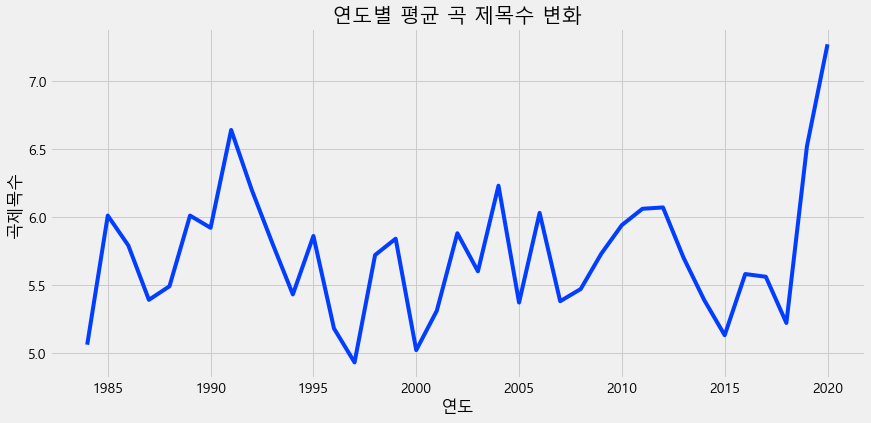

In [57]:
# 시각화
plt.figure(figsize=(13, 6))
plt.title('연도별 평균 곡 제목수 변화')
sns.set_palette("bright")
sns.lineplot(data=title_len_count, x='연도', y='곡제목수')

90년대에 잠깐 높았다가 오르락 내리락을 반복. 하지만 최근 들어 곡 제목수가 늘어난 모습을 볼 수 있다.

In [59]:
# 전체 시대별 차트 top100에서의 평균 곡 제목 수
title_len_count['곡제목수'].mean()

5.722657345187466

전체 시대별 차트 top100에서의 평균 곡 제목수는 5.7글자로 약 6글자라고 볼 수 있다.

### 그렇다면 평균 곡 제목 수인 6글자를 넘는 곡의 수가 시대별로 차이가 있을까?
* 시대별 곡 제목 6글자 이상인 곡 수

In [60]:
year_title_len_count = pd.DataFrame(melon_df[melon_df['곡제목수'] >= 6].groupby('연도')['제목'].nunique().reset_index())

In [61]:
# 연도를 년대로 나눠주는 함수
def split_by_time(x):
    if x <= 1989:
        return "1980년대"
    elif x <= 1999:
        return "1990년대"
    elif x <= 2009:
        return "2000년대"
    elif x <= 2019:
        return "2010년대"
    else:
        return "2020년대"

In [62]:
# 함수 적용해서 새 컬럼 만들기
year_title_len_count['년대'] = year_title_len_count['연도'].apply(lambda x: split_by_time(x))

In [63]:
# 년대별 곡 제목이 6글자 이상인 총 곡 수
six_len = pd.DataFrame(year_title_len_count.groupby('년대')['제목'].sum().reset_index())
six_len = six_len.rename(columns = {'제목' : '6글자 이상인 곡 수'})

In [64]:
six_len

,년대,6글자 이상인 곡 수
0,1980년대,262
1,1990년대,461
2,2000년대,423
3,2010년대,440
4,2020년대,59


<AxesSubplot:title={'center':'연대별 6글자 이상인 곡 수'}, xlabel='년대', ylabel='6글자 이상인 곡 수'>

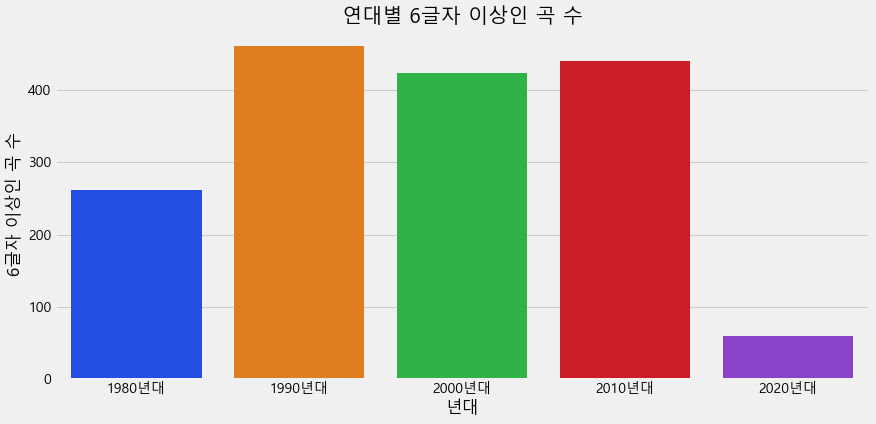

In [65]:
# 시각화
plt.figure(figsize=(13, 6))
plt.title('연대별 6글자 이상인 곡 수')
sns.set_palette("bright")
sns.barplot(data=six_len, x='년대', y='6글자 이상인 곡 수')

전체년도 평균 곡 제목 수였던 6글자를 넘은 곡의 수는 top100 차트 안의 곡에서는 1990년대가 가장 많은 것으로 나타났다.

### 최근 10년간 차트에 오른 곡들의 평균 곡 제목 수

In [66]:
recently_title_len_count = pd.DataFrame(melon_df[(melon_df['연도'] >= 2010) & (melon_df['연도'] <= 2020)].groupby('연도')['곡제목수'].mean().reset_index())

In [67]:
recently_title_len_count

,연도,곡제목수
0,2010.0,5.94
1,2011.0,6.06
2,2012.0,6.07
3,2013.0,5.70
4,2014.0,5.39
5,2015.0,5.13
6,2016.0,5.58
7,2017.0,5.56
8,2018.0,5.22
9,2019.0,6.52


<AxesSubplot:title={'center':'최근 10년간 차트에 오른 곡들의 평균 곡 제목 수'}, xlabel='연도', ylabel='곡제목수'>

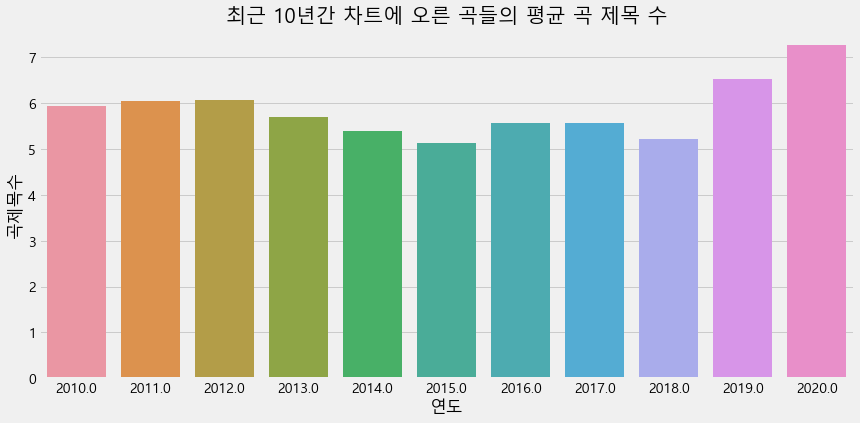

In [68]:
# 시각화
plt.figure(figsize=(13, 6))
plt.title('최근 10년간 차트에 오른 곡들의 평균 곡 제목 수')
sns.set_palette("bright")
sns.barplot(data=recently_title_len_count, x='연도', y='곡제목수')

* 최근 10년간 차트에 오른 곡들을 살펴보면 2010년대는 오히려 곡 제목수가 짧은게 트렌드였음을 확인 할 수 있다. 
* 뒷받침하는 기사: https://news.sbs.co.kr/news/endPage.do?news_id=N1002417879
* 최근에서야 다시 곡 제목수가 길어지는 추세이다.

In [69]:
# 여성 댄스 그룹
female_dance_group = melon_df[(melon_df['성별'] == '여성') & (melon_df['솔로/그룹'] == '그룹') & (melon_df['장르'] == '댄스')]

In [76]:
# 여성 댄스 그룹이 전체 평균 곡 제목 수
female_dance_group['곡제목수'].mean()

6.156626506024097

In [85]:
# 여성 댄스 그룹의 연도별 평균 곡 제목 수
pd.DataFrame(female_dance_group.groupby('연도')['곡제목수'].mean().reset_index())

,연도,곡제목수
0,1996.0,2.000000
1,1997.0,3.000000
2,1998.0,8.800000
3,1999.0,8.800000
4,2000.0,2.750000
5,2001.0,3.666667
6,2002.0,1.500000
7,2003.0,4.000000
8,2005.0,7.000000
9,2006.0,13.000000


<AxesSubplot:title={'center':'연도별 여성 댄스 그룹의 곡 제목 수 boxplot'}, xlabel='연도', ylabel='곡제목수'>

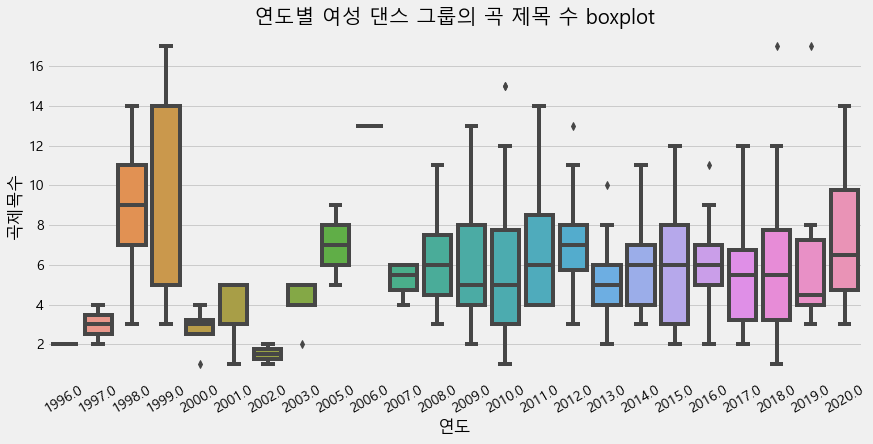

In [83]:
# 평균으로만 보는 것은 오류가 있을 수 있으므로 boxplot으로도 시각화

plt.figure(figsize=(13, 6))
plt.xticks(rotation = 30)
plt.title('연도별 여성 댄스 그룹의 곡 제목 수 boxplot')
sns.boxplot(data=female_dance_group, x='연도', y='곡제목수')


<AxesSubplot:title={'center':'최근 10년 여성 댄스 그룹의 곡 제목 수 boxplot'}, xlabel='연도', ylabel='곡제목수'>

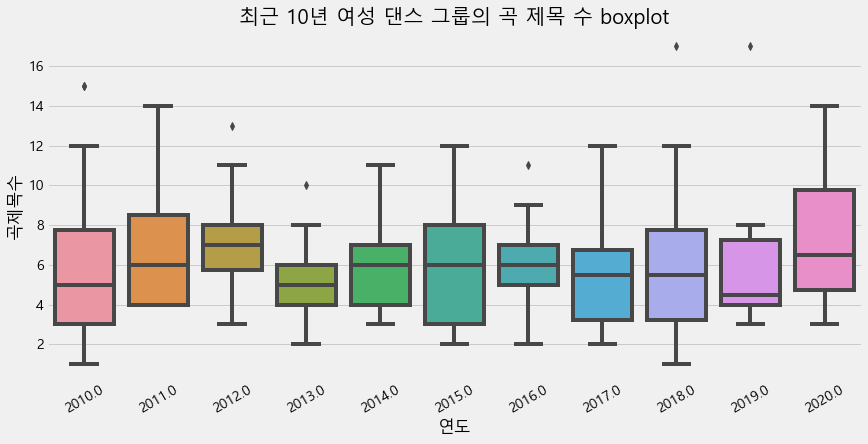

In [84]:
# 최근 10년으로 시각화
plt.figure(figsize=(13, 6))
plt.xticks(rotation = 30)
plt.title('최근 10년 여성 댄스 그룹의 곡 제목 수 boxplot')
sns.boxplot(data=female_dance_group[female_dance_group['연도'] >= 2010], x='연도', y='곡제목수')

### 곡 제목 수도 순위에 영향을 미치는가?

In [73]:
corr = melon_df.corr()

<AxesSubplot:>

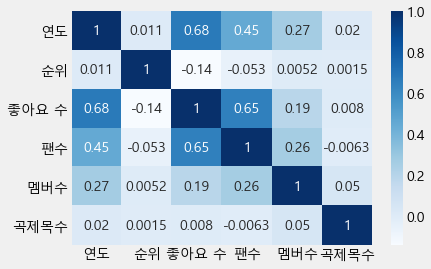

In [74]:
sns.set_palette("bright")
sns.heatmap(corr, annot=True, cmap='Blues')

곡 제목 수가 연도별로 다르지만 이것이 순위에 영향을 미치는 요소는 아닌것으로 보인다. 순위를 의식해서 곡 제목 수가 늘어났다기보단 사회적인 유행이 곡 제목 수에 영향을 준 것으로 추측된다. 